In [319]:
import utils
import numpy as np
from skrf import Network, Frequency
from matplotlib import pyplot as plt
import torch

ROOT_PATH = "/scratch1/04703/sravula/UTAFSDataNew/new_data"

In [320]:
CHIP_NUM = 3

a = utils.get_network_from_file(ROOT_PATH, CHIP_NUM)

In [321]:
print("length", a["length"])
print("sweep: ", a["sweep"])
for pair in a["port_pairs"]:
    print("port pair: ", pair)

length MEDIUM
sweep:  LINEAR
port pair:  (1, 2)
port pair:  (3, 4)


In [322]:
out_network = a["network"]
out_freqs = out_network.frequency

In [323]:
print("unit: ", out_freqs.unit)
print('start: {:.3e}'.format(out_freqs.start))
print('end: {:.3e}'.format(out_freqs.stop))
print('spacing: {:.3e}'.format(out_freqs.step))
print("Number of Frequencies: ", out_freqs.npoints)

unit:  Hz
start: 0.000e+00
end: 3.000e+10
spacing: 3.000e+08
Number of Frequencies:  101


In [324]:
out_matrix_re = out_network.s.real
out_matrix_im = out_network.s.imag
out_matrix = np.stack((out_matrix_re, out_matrix_im), axis=-1)

out_sparams = utils.matrix_to_sparams(out_matrix)

out_sparams = out_sparams.reshape(1, -1, out_freqs.npoints)

print(out_sparams.shape)

(1, 20, 101)


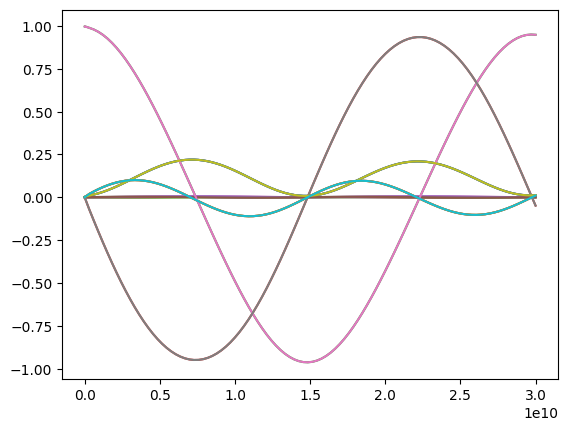

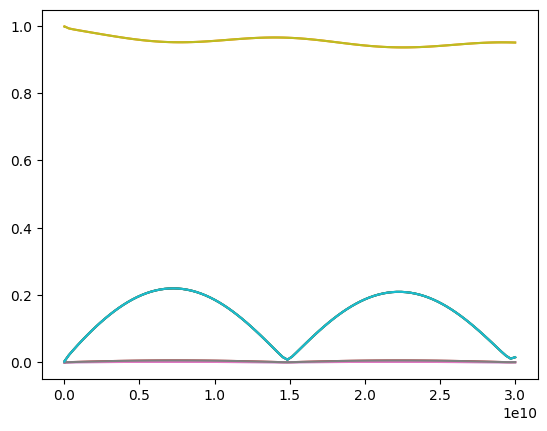

In [325]:
plt.figure()
for i in range(out_sparams.shape[1]):
    label = str(i//2) + (" re" if i % 2 == 0 else " im")
    plt.plot(out_freqs.f, out_sparams[0,i,:], label=label)
if out_sparams.shape[1] <= 16:
    plt.legend()
plt.show()

out_mag = utils.sparams_to_mag(torch.tensor(out_sparams))

plt.figure()
for i in range(out_sparams.shape[1]//2):
    plt.plot(out_freqs.f, out_mag[0,i,:], label=str(i))
if out_sparams.shape[1] <= 16:
    plt.legend()
plt.show()

In [326]:
new_spacing = out_freqs.start if out_freqs.start > (out_freqs.stop / 2**14) else out_freqs.f[1] 
num_new_freqs = int((out_freqs.stop - new_spacing) / new_spacing)

new_freqs = np.linspace(start=new_spacing, 
                        stop=out_freqs.stop,
                        num=num_new_freqs+1)

new_freqs = Frequency.from_f(new_freqs, unit="hz")

In [327]:
out_network.resample(new_freqs)
out_freqs = out_network.frequency

In [328]:
print("unit: ", out_freqs.unit)
print('start: {:.3e}'.format(out_freqs.start))
print('end: {:.3e}'.format(out_freqs.stop))
print('spacing: {:.3e}'.format(out_freqs.step))
print("Number of Frequencies: ", out_freqs.npoints)

unit:  Hz
start: 1.000e+04
end: 3.000e+10
spacing: 1.000e+04
Number of Frequencies:  3000000


In [329]:
out_matrix_re = out_network.s.real
out_matrix_im = out_network.s.imag
out_matrix = np.stack((out_matrix_re, out_matrix_im), axis=-1)

out_sparams = utils.matrix_to_sparams(out_matrix)

out_sparams = out_sparams.reshape(1, -1, out_freqs.npoints)

print(out_sparams.shape)

(1, 20, 3000000)


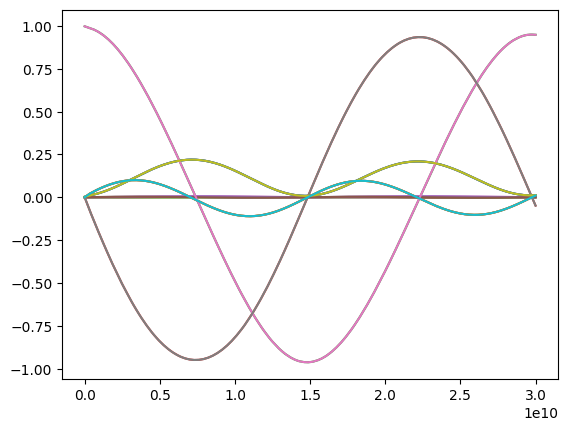

KeyboardInterrupt: 

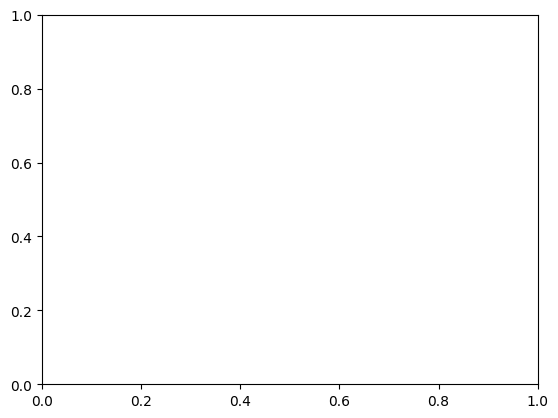

In [330]:
plt.figure()
for i in range(out_sparams.shape[1]):
    label = str(i//2) + (" re" if i % 2 == 0 else " im")
    plt.plot(out_freqs.f, out_sparams[0,i,:], label=label)
if out_sparams.shape[1] <= 16:
    plt.legend()
plt.show()

out_mag = utils.sparams_to_mag(torch.tensor(out_sparams))

plt.figure()
for i in range(out_sparams.shape[1]//2):
    plt.plot(out_freqs.f, out_mag[0,i,:], label=str(i))
if out_sparams.shape[1] <= 16:
    plt.legend()
plt.show()